### Integrantes  
Bryann Alfaro  
Raul Jimenez  
Donaldo Garcia  

Questions  
balance data?  
extract numbers with columns (number of api calls just that)  
Kfolds validation?

# Desarrollo

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## Analisis exploratorio

In [2]:
#read the data
df = pd.read_csv('VirusSample.csv')
df.head()

,file,api,class
0,7ff49f2f0912352416b05c010f35f402cc79feed,"IntersectRect,GetCurrentProcess,GetVersion",Virus
1,50cc6c99ec285d0db45dde07d8fdc18d9098c5b6,"GetCaretBlinkTime,CountClipboardFormats,GetCon...",Virus
2,f77c6bd4aebacd1a01d02e0cb20642ebf2d32929,"VarR8Pow,GetClipboardViewer,GetInputDesktop,Ge...",Virus
3,349c367c5b88fbb6cafae5d7109588d7250e16b5,"SetTraceCallback,CopyAcceleratorTableW,GetProc...",Virus
4,021f4aa86b520e1d606ab26699c35546bcd00c27,"SHLoadNonloadedIconOverlayIdentifiers,VarUI8Fr...",Virus


In [3]:
#show the different classes
df['class'].unique()


array(['Virus', 'Riskware', 'Spyware', 'Downloader', 'Dropper', 'Agent',
       'Adware', 'Trojan', 'Backdoor', 'Worms', 'Ransomware', 'Keylogger',
       'Crypt'], dtype=object)

In [4]:
df.shape

(9795, 3)

In [5]:
#Pandas profiler
# import pandas_profiling
# pandas_profiling.ProfileReport(df)


In [6]:
#Count the class values
df['class'].value_counts()


Trojan        6153
Virus         2367
Backdoor       447
Worms          441
Adware         222
Agent          102
Downloader      31
Spyware         11
Ransomware      10
Riskware         4
Dropper          4
Crypt            2
Keylogger        1
Name: class, dtype: int64

In [7]:
#Check if there is na values
df.isna().sum()

file     0
api      0
class    0
dtype: int64

## Preprocesamiento

Se puede observar que existe un desbalance en la informacion, tambien hay muestras no representativas dentro del dataset. Porlo que se eliminaran aquellos que presenten menor a 200 datos y se usaran como maximo 440 datos para balanceo

In [8]:
#Delete the observations of class column with less than 200 values
df = df[df['class'].isin(df['class'].value_counts()[df['class'].value_counts() > 200].index)]
df['class'].value_counts()

Trojan      6153
Virus       2367
Backdoor     447
Worms        441
Adware       222
Name: class, dtype: int64

In [9]:
#Keep just a limit of 440 data for each observation
df = df.groupby('class').head(440)
df['class'].value_counts()

Virus       440
Trojan      440
Backdoor    440
Worms       440
Adware      222
Name: class, dtype: int64

In [10]:
df.shape

(1982, 3)

In [11]:
df.head()

,file,api,class
0,7ff49f2f0912352416b05c010f35f402cc79feed,"IntersectRect,GetCurrentProcess,GetVersion",Virus
1,50cc6c99ec285d0db45dde07d8fdc18d9098c5b6,"GetCaretBlinkTime,CountClipboardFormats,GetCon...",Virus
2,f77c6bd4aebacd1a01d02e0cb20642ebf2d32929,"VarR8Pow,GetClipboardViewer,GetInputDesktop,Ge...",Virus
3,349c367c5b88fbb6cafae5d7109588d7250e16b5,"SetTraceCallback,CopyAcceleratorTableW,GetProc...",Virus
4,021f4aa86b520e1d606ab26699c35546bcd00c27,"SHLoadNonloadedIconOverlayIdentifiers,VarUI8Fr...",Virus


In [12]:
df.dropna(inplace=True)
df2 = df.copy()

In [13]:
#count the amount of api calls
df['api_calls'] = df['api'].apply(lambda x: len(x.split(',')))
df.head()


,file,api,class,api_calls
0,7ff49f2f0912352416b05c010f35f402cc79feed,"IntersectRect,GetCurrentProcess,GetVersion",Virus,3
1,50cc6c99ec285d0db45dde07d8fdc18d9098c5b6,"GetCaretBlinkTime,CountClipboardFormats,GetCon...",Virus,4
2,f77c6bd4aebacd1a01d02e0cb20642ebf2d32929,"VarR8Pow,GetClipboardViewer,GetInputDesktop,Ge...",Virus,4
3,349c367c5b88fbb6cafae5d7109588d7250e16b5,"SetTraceCallback,CopyAcceleratorTableW,GetProc...",Virus,5
4,021f4aa86b520e1d606ab26699c35546bcd00c27,"SHLoadNonloadedIconOverlayIdentifiers,VarUI8Fr...",Virus,5


In [14]:
#drop file name and api columns
df.drop(['file', 'api'], axis=1, inplace=True)
df.head()

,class,api_calls
0,Virus,3
1,Virus,4
2,Virus,4
3,Virus,5
4,Virus,5


In [15]:
df.shape

(1982, 2)

# Modelos

Random Forest

In [16]:
#Use random forest for classification and cross validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer


In [17]:
#Split the data into train and test
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(df2['api'])
y = df2['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)


Accuracy:  0.9159663865546218
              precision    recall  f1-score   support

      Adware       0.95      0.82      0.88        67
    Backdoor       0.99      0.94      0.97       138
      Trojan       0.88      0.84      0.86       128
       Virus       0.94      0.99      0.97       137
       Worms       0.84      0.94      0.88       125

    accuracy                           0.92       595
   macro avg       0.92      0.91      0.91       595
weighted avg       0.92      0.92      0.92       595



0.9258083346023044

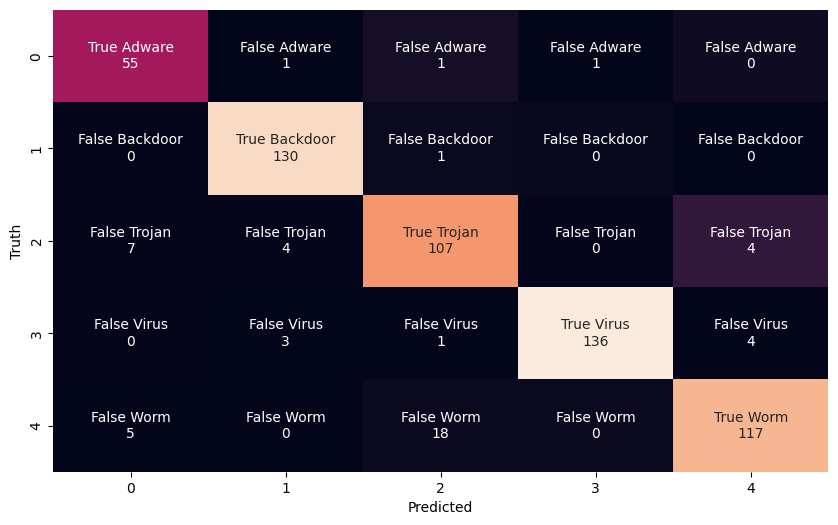

In [18]:
#Create the model
rfc = RandomForestClassifier(n_estimators=200)

rfc.fit(X_train, y_train)

#Predict the test data
rfc_pred = rfc.predict(X_test)

#Check the accuracy
print('Accuracy: ', accuracy_score(y_test, rfc_pred))

# Make a confusion matrix to see the results with labels in heatmap
plt.figure(figsize=(10,6))
# create the group names and group sizes for the first array
group_names1 = ['True Adware', 'False Backdoor', 'False Trojan', 'False Virus', 'False Worm']
group_counts1 = ['{0:0.0f}'.format(value) for value in confusion_matrix(y_test, rfc_pred)[0]]
labels_group1 = ['{0}\n{1}'.format(v1, v2) for v1, v2 in zip(group_names1, group_counts1)]
labels_group1 = np.asarray(labels_group1).reshape(5,1)
# create the group names and group sizes for the second array
group_names2 = ['False Adware', 'True Backdoor', 'False Trojan', 'False Virus', 'False Worm']
group_counts2 = ['{0:0.0f}'.format(value) for value in confusion_matrix(y_test, rfc_pred)[1]]
labels_group2 = ['{0}\n{1}'.format(v1, v2) for v1, v2 in zip(group_names2, group_counts2)]
labels_group2 = np.asarray(labels_group2).reshape(5,1)
# create the group names and group sizes for the third array
group_names3 = ['False Adware', 'False Backdoor', 'True Trojan', 'False Virus', 'False Worm']
group_counts3 = ['{0:0.0f}'.format(value) for value in confusion_matrix(y_test, rfc_pred)[2]]
labels_group3 = ['{0}\n{1}'.format(v1, v2) for v1, v2 in zip(group_names3, group_counts3)]
labels_group3 = np.asarray(labels_group3).reshape(5,1)
# create the group names and group sizes for the fourth array
group_names4 = ['False Adware', 'False Backdoor', 'False Trojan', 'True Virus', 'False Worm']
group_counts4 = ['{0:0.0f}'.format(value) for value in confusion_matrix(y_test, rfc_pred)[3]]
labels_group4 = ['{0}\n{1}'.format(v1, v2) for v1, v2 in zip(group_names4, group_counts4)]
labels_group4 = np.asarray(labels_group4).reshape(5,1)
# create the group names and group sizes for the fifth array
group_names5 = ['False Adware', 'False Backdoor', 'False Trojan', 'False Virus', 'True Worm']
group_counts5 = ['{0:0.0f}'.format(value) for value in confusion_matrix(y_test, rfc_pred)[4]]
labels_group5 = ['{0}\n{1}'.format(v1, v2) for v1, v2 in zip(group_names5, group_counts5)]
labels_group5 = np.asarray(labels_group5).reshape(5,1)
# create the final array
labels = np.concatenate((labels_group1, labels_group2, labels_group3, labels_group4, labels_group5), axis=1)
# set the labels
sns.heatmap(confusion_matrix(y_test, rfc_pred), annot=labels, fmt='', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Truth')
# print(confusion_matrix(y_test, rfc_pred))



#Check the classification report
print(classification_report(y_test, rfc_pred))

#Check the cross validation score
cross_val_score(rfc, X, y, cv=10, scoring='accuracy').mean()



SVM

Accuracy:  0.9109243697478991
              precision    recall  f1-score   support

      Adware       0.86      0.83      0.85        60
    Backdoor       0.96      0.96      0.96       143
      Trojan       0.88      0.83      0.85       136
       Virus       0.92      0.96      0.94       130
       Worms       0.91      0.93      0.92       126

    accuracy                           0.91       595
   macro avg       0.90      0.90      0.90       595
weighted avg       0.91      0.91      0.91       595



Text(95.72222222222221, 0.5, 'Truth')

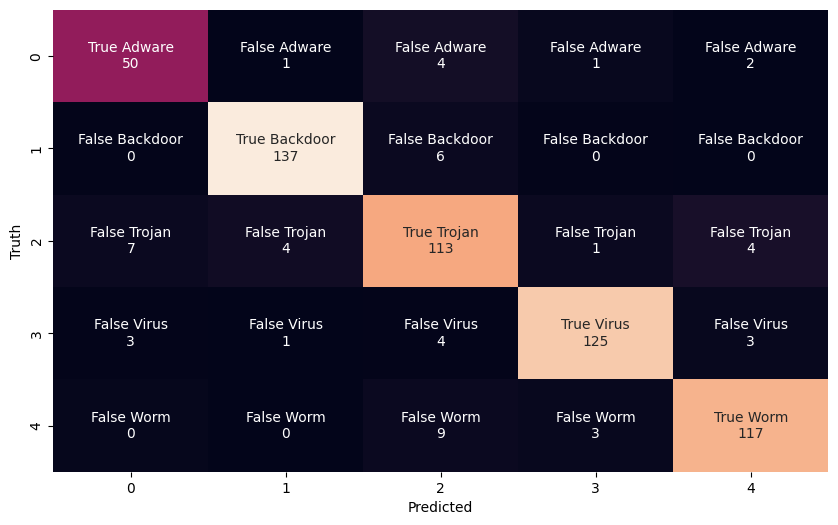

In [22]:
# create the svm model to predict the class
from sklearn.svm import SVC
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(df2['api'])
y = df2['class']
#Split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# create the svm model to predict the class
from sklearn.svm import SVC
svc_model = SVC()
svc_model.fit(X_train, y_train)
svc_pred = svc_model.predict(X_test)
print('Accuracy: ', accuracy_score(y_test, svc_pred))

#metrics
#print(confusion_matrix(y_test, svc_pred))
print(classification_report(y_test, svc_pred))
#Check the cross validation score
cross_val_score(svc_model, X, y, cv=10, scoring='accuracy').mean()

#confusion matrix
# Make a confusion matrix to see the results with labels in heatmap
plt.figure(figsize=(10,6))
# create the group names and group sizes for the first array
group_names1 = ['True Adware', 'False Backdoor', 'False Trojan', 'False Virus', 'False Worm']
group_counts1 = ['{0:0.0f}'.format(value) for value in confusion_matrix(y_test, svc_pred)[0]]
labels_group1 = ['{0}\n{1}'.format(v1, v2) for v1, v2 in zip(group_names1, group_counts1)]
labels_group1 = np.asarray(labels_group1).reshape(5,1)

# create the group names and group sizes for the second array
group_names2 = ['False Adware', 'True Backdoor', 'False Trojan', 'False Virus', 'False Worm']
group_counts2 = ['{0:0.0f}'.format(value) for value in confusion_matrix(y_test, svc_pred)[1]]
labels_group2 = ['{0}\n{1}'.format(v1, v2) for v1, v2 in zip(group_names2, group_counts2)]
labels_group2 = np.asarray(labels_group2).reshape(5,1)

# create the group names and group sizes for the third array
group_names3 = ['False Adware', 'False Backdoor', 'True Trojan', 'False Virus', 'False Worm']
group_counts3 = ['{0:0.0f}'.format(value) for value in confusion_matrix(y_test, svc_pred)[2]]
labels_group3 = ['{0}\n{1}'.format(v1, v2) for v1, v2 in zip(group_names3, group_counts3)]
labels_group3 = np.asarray(labels_group3).reshape(5,1)

# create the group names and group sizes for the fourth array
group_names4 = ['False Adware', 'False Backdoor', 'False Trojan', 'True Virus', 'False Worm']
group_counts4 = ['{0:0.0f}'.format(value) for value in confusion_matrix(y_test, svc_pred)[3]]
labels_group4 = ['{0}\n{1}'.format(v1, v2) for v1, v2 in zip(group_names4, group_counts4)]
labels_group4 = np.asarray(labels_group4).reshape(5,1)

# create the group names and group sizes for the fifth array
group_names5 = ['False Adware', 'False Backdoor', 'False Trojan', 'False Virus', 'True Worm']
group_counts5 = ['{0:0.0f}'.format(value) for value in confusion_matrix(y_test, svc_pred)[4]]
labels_group5 = ['{0}\n{1}'.format(v1, v2) for v1, v2 in zip(group_names5, group_counts5)]
labels_group5 = np.asarray(labels_group5).reshape(5,1)

# create the final array
labels = np.concatenate((labels_group1, labels_group2, labels_group3, labels_group4, labels_group5), axis=1)

# set the labels
sns.heatmap(confusion_matrix(y_test, svc_pred), annot=labels, fmt='', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Truth')

¿se lograron obtener mejores métricas que las obtenidas en el
artículo para la clasificación de malware?